# Objective
The objective is to analyze customer behaviour to understand retention patterns. This includes cleaning and transforming customer data, conducting exploratory data analysis (EDA), and improve customer retention.

# Data Collection and Exploration

In [30]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Loading the Dataset
df=pd.read_csv('Customer Churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Inspection of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Detecting and handling outliers

In [39]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [40]:
def find_outliers(column_data):
    numbers = column_data.values
    minimum, Q1, median, Q3, maximum = np.quantile(numbers, [0, 0.25, 0.5, 0.75, 1])
    print(f"{column_data.name} - Min: {minimum}, Q1: {Q1}, Median: {median}, Q3: {Q3}, Max: {maximum}")
    iqr = Q3 - Q1
    print(f"IQR for {column_data.name}: {iqr}")
    lower_fence = Q1 - 1.5 * iqr
    higher_fence = Q3 + 1.5 * iqr
    print(f"Lower fence: {lower_fence}, Higher fence: {higher_fence}")
    outliers = [num for num in numbers if num < lower_fence or num > higher_fence]
    return outliers, lower_fence, higher_fence

# Detect outliers
monthly_outliers, monthly_low, monthly_high = find_outliers(df['MonthlyCharges'])
total_outliers, total_low, total_high = find_outliers(df['TotalCharges'])

# Remove outliers
df_cleaned = df[(df['MonthlyCharges'] >= monthly_low) & (df['MonthlyCharges'] <= monthly_high) &
                (df['TotalCharges'] >= total_low) & (df['TotalCharges'] <= total_high)]

print("Original dataset size:", len(df))
print("Cleaned dataset size:", len(df_cleaned))


MonthlyCharges - Min: 18.0, Q1: 35.0, Median: 70.0, Q3: 89.0, Max: 118.0
IQR for MonthlyCharges: 54.0
Lower fence: -46.0, Higher fence: 170.0
TotalCharges - Min: nan, Q1: nan, Median: nan, Q3: nan, Max: nan
IQR for TotalCharges: nan
Lower fence: nan, Higher fence: nan
Original dataset size: 7043
Cleaned dataset size: 0


In [ ]:
# Replacing blanks with 0 as tenure is 0 and no total charges are recorded
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   object
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Duplicated values
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking duplicates on the row with unique values
df['customerID'].duplicated().sum()

np.int64(0)

# Observation
- This dataset has no duplicated values.
- This dataset has no missing values 


In [ ]:
# converted 0 and 1 of seniorcitizen column to yes/no
def conv(value):
    if value==1:
        return 'Yes'
    elif value==0:
        return 'No'
df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Exploratory Data Analysis

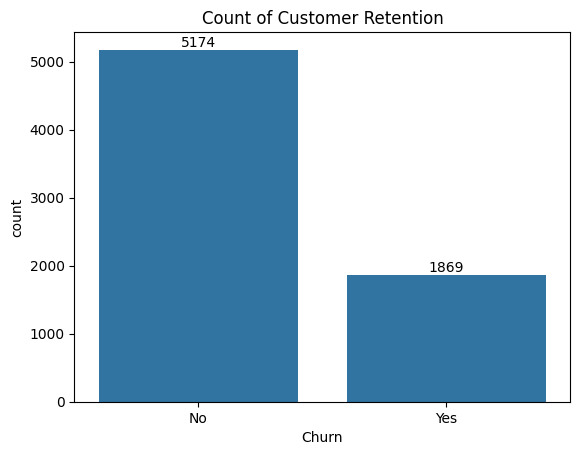

In [ ]:
# Finding number of customers who has churned out or retained.
y=sns.countplot(x= 'Churn', data=df)
y.bar_label(y.containers[0])
plt.title('Count of Customer Retention')
plt.show()

# Observation
- 5174 customers stayed while 1869 churned out

In [ ]:
# Percentage of customer who churned out and retained.
gb=df.groupby('Churn').agg({'Churn':'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


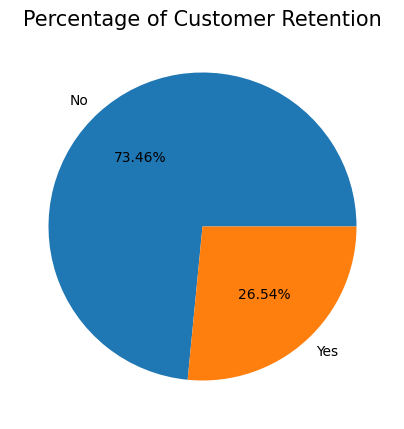

,Churn
Churn,
No,5174
Yes,1869


In [ ]:
plt.figure(figsize=(5,5))
plt.pie(gb['Churn'],labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of Customer Retention', fontsize=15)
plt.show()
gb

# Observation
- From the given pie chart, we can say that 26.54% of customers have stayed

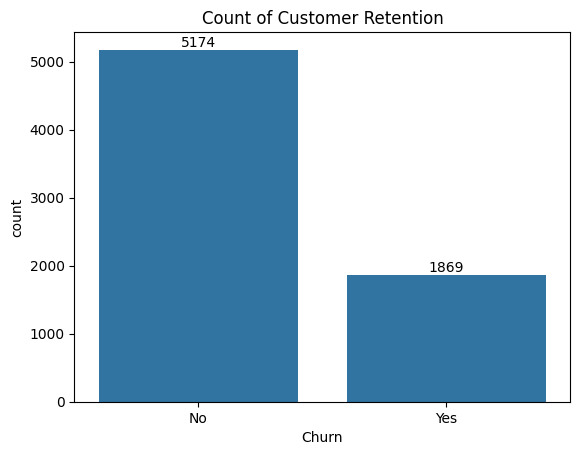

In [ ]:
# Finding number of customers who has churned out or retained.
y=sns.countplot(x= 'Churn', data=df)
y.bar_label(y.containers[0])
plt.title('Count of Customer Retention')
plt.show()

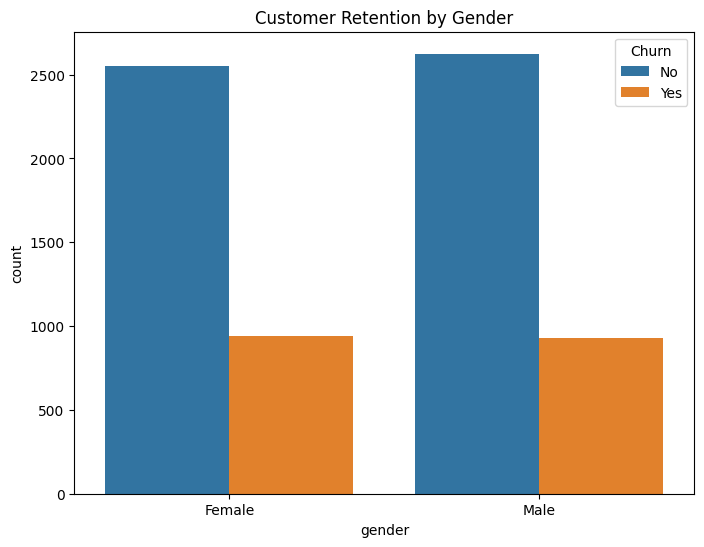

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Customer Retention by Gender')
plt.show()

# Observation
- Gender has no impact on retention of the customers

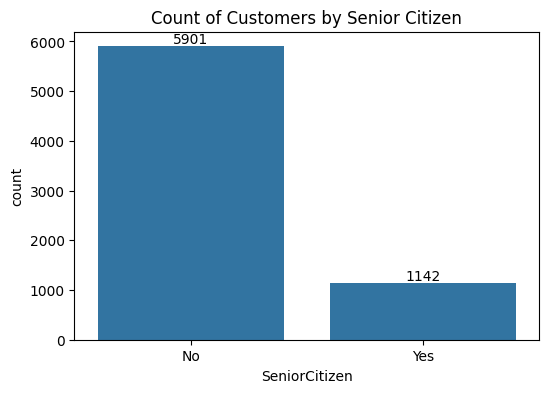

In [ ]:
plt.figure(figsize=(6,4))
z=sns.countplot(x='SeniorCitizen', data=df)
z.bar_label(z.containers[0])
plt.title('Count of Customers by Senior Citizen')
plt.show()

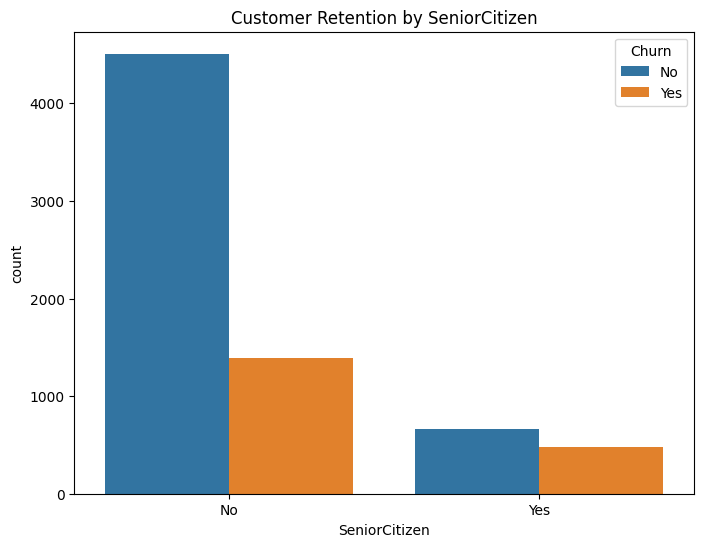

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title('Customer Retention by SeniorCitizen')
plt.show()

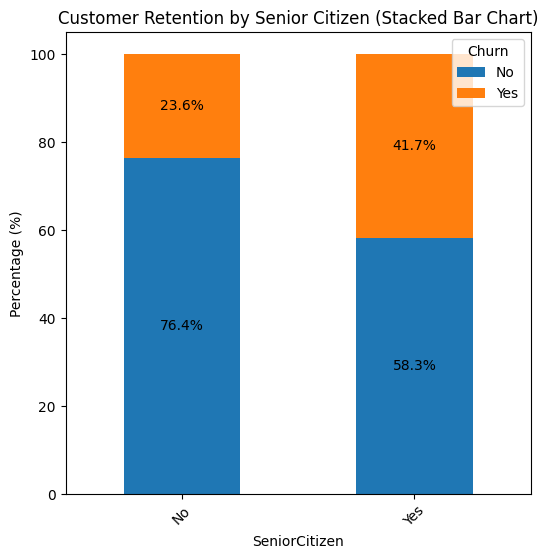

In [ ]:
total_counts= df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
#Plot
fig, ax= plt.subplots(figsize=(6,6))

#Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4','#ff7f0e'])

#Add percentage labels on the bars
for p in ax.patches:
    width, height=p.get_width(), p.get_height()
    x,y= p.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:.1f}%', ha='center', va='center')
plt.title('Customer Retention by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

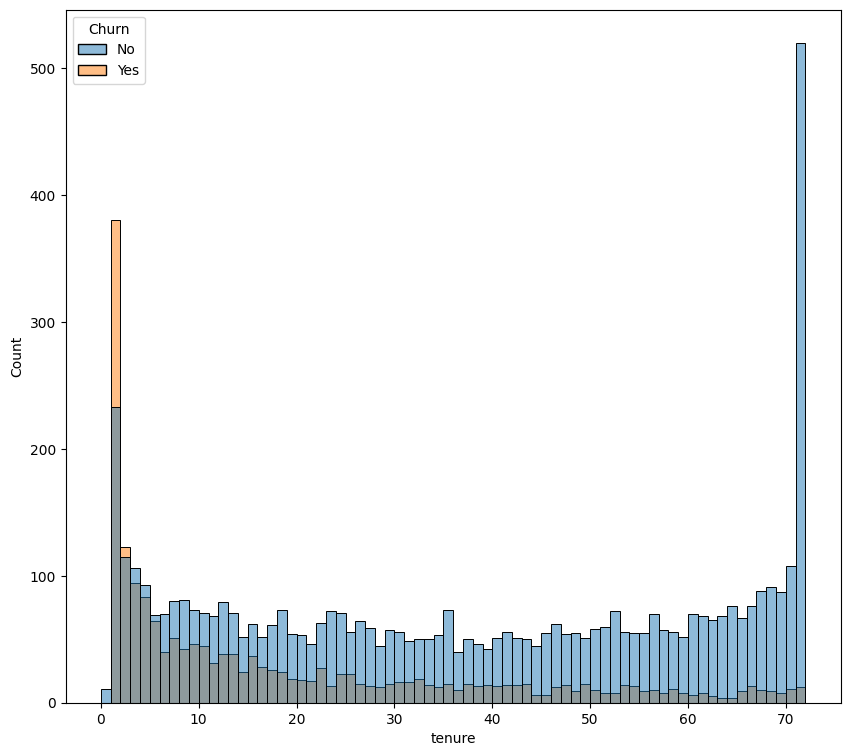

In [ ]:
plt.figure(figsize=(10,9))
sns.histplot(x='tenure', data=df, bins=72, hue='Churn')
plt.show()

# Observation
- People who have used our services for a long time have stayed and people who have out services for 1 or 2 months have churned.

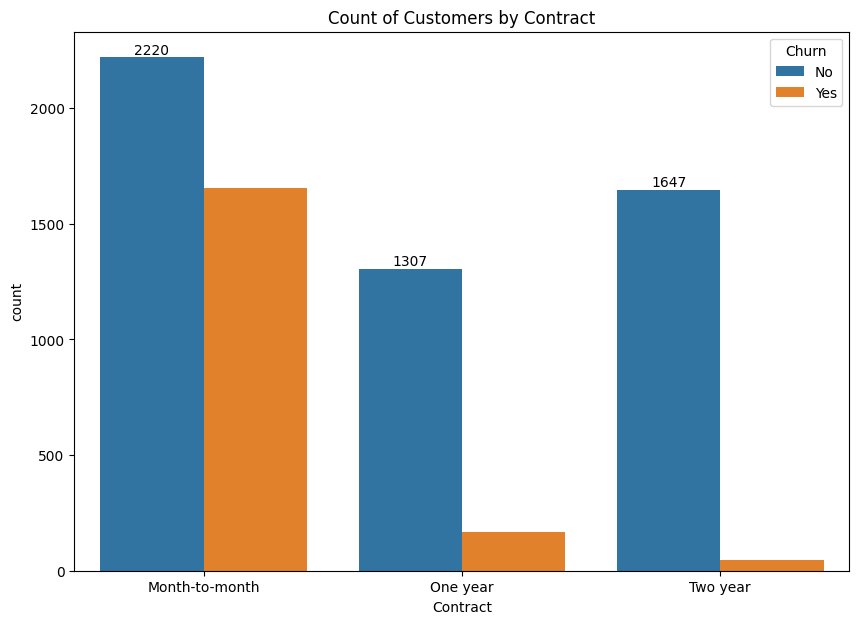

In [ ]:
plt.figure(figsize=(10,7))
c=sns.countplot(x='Contract', data=df,hue='Churn')
c.bar_label(c.containers[0])
plt.title('Count of Customers by Contract')
plt.show()

# Observation
- Customers who have 1 or 2 years of contract have stayed and customers who have month-to-month contract have churned.

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

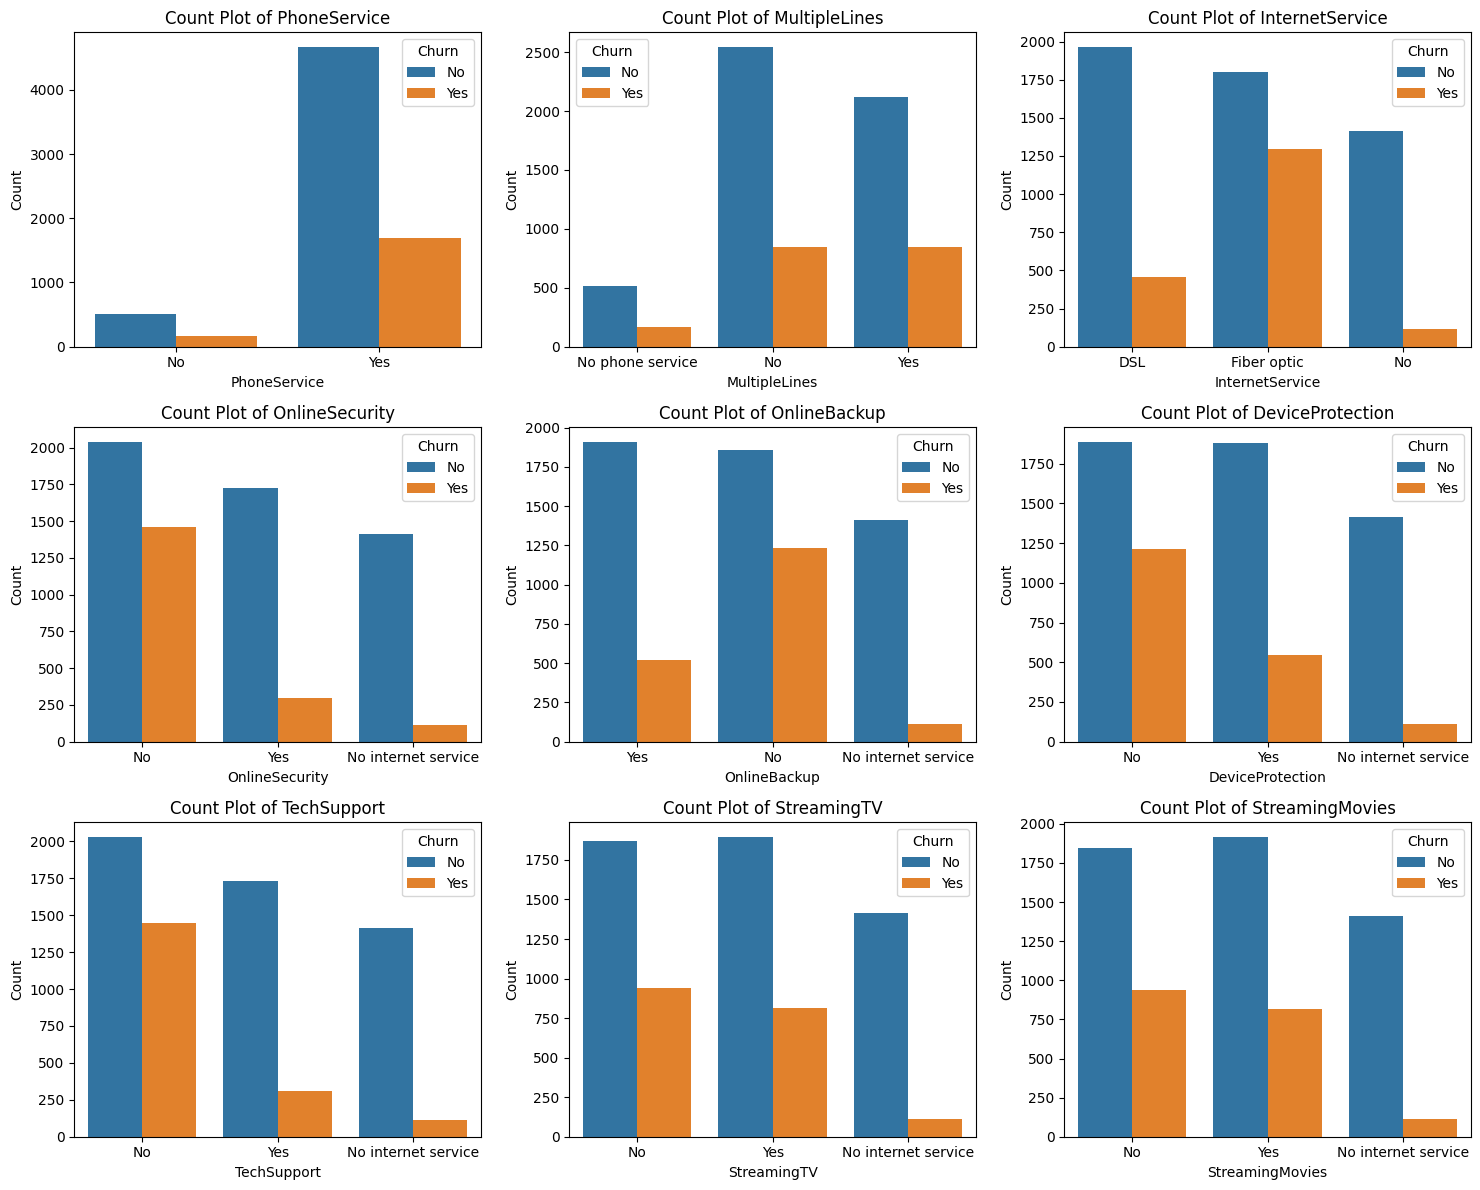

In [ ]:
# Lists of columns fow which we want to create count plots
columns= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid
n_cols=3
n_rows= (len(columns)+ n_cols-1)//n_cols

# Create subplots
fig,axes=plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))

# Flatten the axes arrayfor easy iteration (handles both 1D and 2D arrays)
axes= axes.flatten()

#Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaces(axes[j])
    
plt.tight_layout()
plt.show()

# Observation
- The majority of customer who stayed tend to have services like PhoneService, InternetService(Particularly DSL) and OnlineSecurity enabled. 
- For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used. 

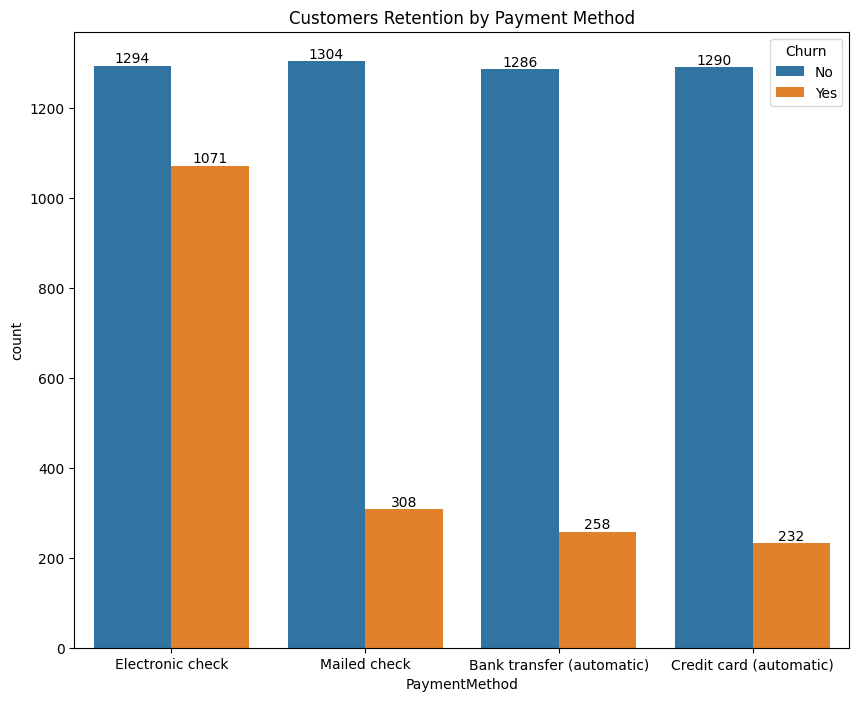

In [ ]:
plt.figure(figsize=(10,8))
p=sns.countplot(x='PaymentMethod', data=df, hue='Churn')
p.bar_label(p.containers[0])
p.bar_label(p.containers[1])
plt.title('Customers Retention by Payment Method')
plt.xticks(rotation=0)
plt.show()

# Observation
- Customers are likely to stay when they are paying through Mailed check, Bank Transfer and Credit cards.
- Customers are likely to churn when their payment method is Electronic check

# Recommendations
- Promote Long-Term Contracts:
    - Offer incentives for customers to commit longer contracts to reduce churn.
- Address Payment Method Concerns:
    - Implement campaigns encouraging customers to switch from electronic checks to more reliable payment methods.
- Customer Engagement in Early Tenure:
    - Focus on improving customers experience within the first year, as churn is highest in this period.
- Special Senior Citizen Retention Programs:
    - Create personalized offers or assistance programs to retain the senir citizens.